In [9]:
import cvxpy as cp
import numpy as np
np.set_printoptions(precision=3)
n = 2
m = 2
P = np.array([[0.2050078785,0.7949921215],
              [0.7316819956,0.2683180044]])
sum_x=1
states=""
C = 0
x =[]
if n*m == 0:
    print('The range of both input and output values must be greater than zero')
x = cp.Variable(shape=n)
y = P*x
c = np.sum(P*np.log2(P),axis=0)
I = c*x + cp.sum(cp.entr(y))
obj = cp.Minimize(-I)
constraints = [cp.sum(x) == sum_x,x >= 0]
prob = cp.Problem(obj,constraints)
prob.solve()
if prob.status=='optimal':
    states= prob.status
    C = prob.value
    x = x.value
else:
    states= prob.status
    C = np.nan
    x = np.nan
    
print('Problem status: ',states)
print('Optimal value of C = {:.4g}'.format(C))
print('Optimal variable x = \n', x)

Problem status:  optimal
Optimal value of C = 0.09222
Optimal variable x = 
 [0.511 0.489]


c:\users\srikanthkamparaju\appdata\local\programs\python\python37\lib\site-packages\cvxpy\expressions\expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 15 times so far.

  warnings.warn(msg, UserWarning)
c:\users\srikanthkamparaju\appdata\local\programs\python\python37\lib\site-packages\cvxpy\expressions\expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path h

In [15]:
import numpy as np

x = (np.load('./mss.npy')).flatten()
p = [[0.2718549983, 0.7281450017], [0.6653328103, 0.3346671897]] # P(Y|X) matrix

y = np.zeros(len(x))
x_i = np.zeros(len(x))
for i in range(len(x)):
    y[i] = np.random.binomial(1, p[1][x[i]])
    if p[0][int(y[i])] >= p[1][int(y[i])]:
        x_i[i] = 0
    else:
        x_i[i] = 1

print("BER:", np.sum(x != x_i) / len(x))

BER: 0.332675


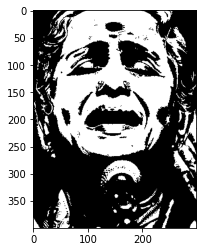

0.13560833333333333


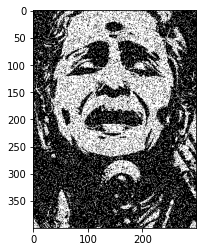

In [1]:
import numpy as np
from matplotlib import pyplot as plt

mss = np.load('mss.npy')
mss_shape = np.shape(mss)
#Original image
plt.imshow(mss,'gray')
plt.show()

#Channel parameters
x0 = [0.2050078785,0.7949921215]
x1 = [0.7316819956,0.2683180044]

#Converting mss to a string
MSS = ''
for i in range(mss_shape[0]):
    for j in range(mss_shape[1]):
        MSS += str(mss[i][j])

#definition for encoding for a single bit
def encoder(a):
    if(a == '0'):
        return '000'
    if(a == '1'):
        return '111'

#encoding
mss_enc = ''
for i in range(len(MSS)):
    mss_enc += encoder(MSS[i])

#definition for simulating channel for a single bit
def channel(a,x0,x1):
    if(a == '0'):
        temp = np.random.uniform(0,1)
        if(temp < x0[0]):
            return '0'
        else:
            return '1'
    if(a == '1'):
        temp = np.random.uniform(0,1)
        if(temp < x1[0]):
            return '0'
        else:
            return '1'

#Simulating the channel
Y = ''
for i in range(len(mss_enc)):
    Y += channel(mss_enc[i],x0,x1)

#ML decoder for a every three bits
def decoder(a,x0,x1):
    temp1 = 1
    temp2 = 1
    for i in a:
        if(i == '0'):
            temp1 = temp1*x0[0]
            temp2 = temp2*x1[0]
        if(i == '1'):
            temp1 = temp1*x0[1]
            temp2 = temp2*x1[1]
    if(temp1 > temp2):
        return '0'
    else:
        return '1'

#decoding the recieved bits
X = ''
for i in range(int(len(Y)/3)):
    start = i*3
    end = (i+1)*3
    X += decoder(Y[start:end],x0,x1)


#Converting string back to an array
X_arr = np.zeros(len(X))
for i in range(len(X)):
    X_arr[i] = int(X[i])

#bit error rate
X_arr = X_arr.reshape(400,300)
bit_error_rate = np.sum(np.abs(X_arr-mss))/(300*400)
print(bit_error_rate)

#Image constructed from decoded bits
plt.imshow(X_arr,'gray')
plt.show()



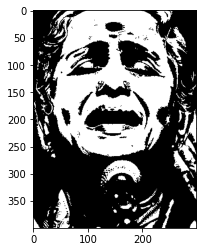

0.17686666666666667


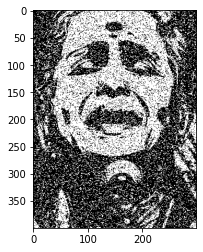

In [9]:
#!/usr/bin/env python
import numpy as np
from matplotlib import pyplot as plt

mss = np.load('mss.npy')
plt.imshow(mss,'gray')
plt.show()

#Channel parameters
x0 = [0.2050078785,0.7949921215]
x1 = [0.7316819956,0.2683180044]

#Converting mss to a string
Mss_str = ''
for i in range(np.shape(mss)[0]):
    for j in range(np.shape(mss)[1]):
        Mss_str += str(mss[i][j])
        

mss_enc2 = ''
for i in range(int(len(Mss_str)/2)):
    start = i*2
    end = (i+1)*2
    if(Mss_str[start:end] == '00'):
        mss_enc2 += '00000'
    if(Mss_str[start:end] == '01'):
        mss_enc2 += '00111'
    if(Mss_str[start:end] == '10'):
        mss_enc2 += '11100'
    if(Mss_str[start:end] == '11'):
        mss_enc2 += '11011'

Y2 = ''
for i in range(len(mss_enc2)):
    if(mss_enc2[i] == '0'):
        t1 = np.random.uniform(0,1)
        if(t1 < x0[0]):
            Y2 += '0'
        else:
            Y2 += '1'
    if(mss_enc2[i] == '1'):
        t1 = np.random.uniform(0,1)
        if(t1 < x1[0]):
            Y2 += '0'
        else:
            Y2 += '1'



# In[51]:

X2 = ''
for k in range(int(len(Y2)/5)):
    start = k*5
    end = (k+1)*5
    cw = ['00000','00111','11100','11011']
    m = None
    index = 0
    for j in cw:
        index +=1
        temp = 1
        for i in range(len(Y2[start:end])):
            k1 = j[i]
            i = Y2[start:end][i]
            if(k1 == '0'):
                if(i == '0'):
                    temp = temp*x0[0]
                if(i == '1'):
                    temp = temp*x0[1]
            if(k1 == '1'):
                if(i == '0'):
                    temp = temp*x1[0]
                if(i == '1'):
                    temp = temp*x1[1]
        if(m == None or temp > m):
            m = temp
            b = index
    if(b == 1):
        X2 += '00'
    if(b == 2):
        X2 += '01'
    if(b == 3):
        X2 += '10'
    if(b == 4):
        X2 += '11'


# In[48]:


#Converting string back to an array
X_arr = np.zeros(len(X2))
for i in range(len(X2)):
    X_arr[i] = int(X2[i])


# In[49]:


#bit error rate
X_arr = X_arr.reshape(400,300)
bit_error_rate = np.sum(np.abs(X_arr-mss))/(300*400)
print(bit_error_rate)


# In[50]:


#Image constructed from decoded bits
plt.imshow(X_arr,'gray')
plt.show()


# In[ ]:




